In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
MIOU_HIGH_AVERAGE = np.array([31.65546255, 31.69907982, 31.27486524, 31.15724451, 30.39143492, 29.92469984]) 
CIOU_HIGH_AVERAGE = np.array([86.87919724, 86.55944827, 84.68491823, 84.94032261, 83.03359585, 81.40978882])
MIOU_LOW_AVERAGE = np.array([31.46771513, 31.61425977, 31.67339616, 31.17884229, 30.96773839, 30.06936172])
CIOU_LOW_AVERAGE = np.array([86.16324981, 85.91851634, 87.1718469, 86.13870783, 86.63930329, 85.55488901])
drops = [0, 1000, 2000, 3000, 4000, 5000]

In [3]:
data = pd.DataFrame()

data['miou_high'] = MIOU_HIGH_AVERAGE
data['miou_low'] = MIOU_LOW_AVERAGE
data['ciou_high'] = CIOU_HIGH_AVERAGE
data['ciou_low'] = CIOU_LOW_AVERAGE
data['drop'] = drops

In [4]:
data

,miou_high,miou_low,ciou_high,ciou_low,drop
0,31.655463,31.467715,86.879197,86.163250,0
1,31.699080,31.614260,86.559448,85.918516,1000
2,31.274865,31.673396,84.684918,87.171847,2000
3,31.157245,31.178842,84.940323,86.138708,3000
4,30.391435,30.967738,83.033596,86.639303,4000
5,29.924700,30.069362,81.409789,85.554889,5000


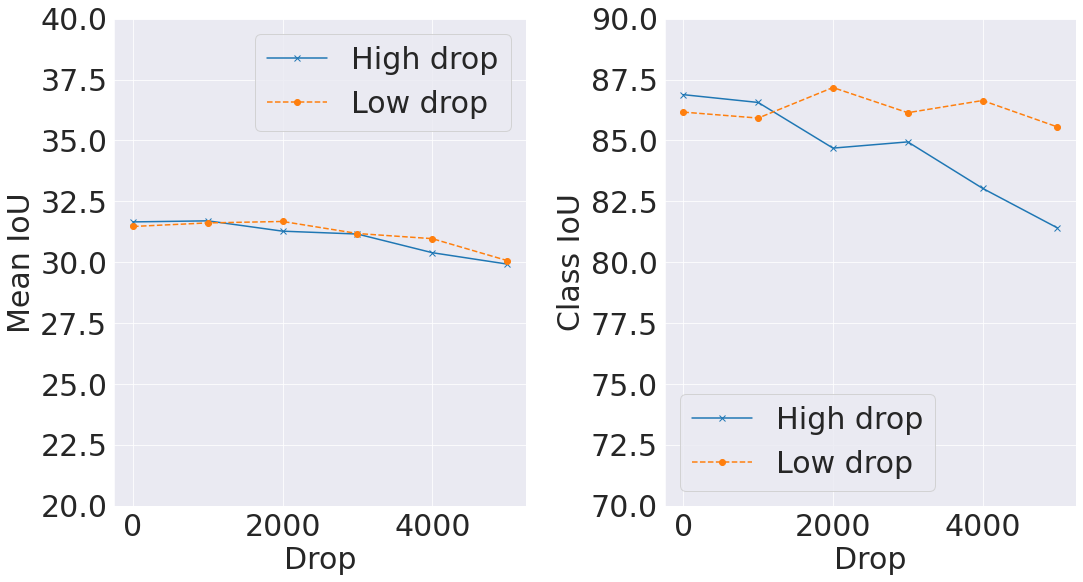

In [15]:
fig = plt.figure(figsize=(16, 16))
sb.set_style('darkgrid')

ax = fig.add_subplot(221)
ax.plot(data['drop'], data['miou_high'], marker='x')
ax.plot(data['drop'], data['miou_low'], marker = 'o', linestyle='dashed')
ax.set_ylim(20, 40)
ax.set_ylabel('Mean IoU', fontsize=30)
ax.set_xlabel('Drop', fontsize=30)
ax.legend(['High drop', 'Low drop'], fontsize=30)


ax = fig.add_subplot(222)
ax.plot(data['drop'], data['ciou_high'], marker='x')
ax.plot(data['drop'], data['ciou_low'], marker='o', linestyle='dashed')
ax.set_ylim(70, 90)
ax.set_ylabel('Class IoU', fontsize=30)
ax.set_xlabel('Drop', fontsize=30)
ax.legend(['High drop', 'Low drop'], fontsize=30)

plt.rc('font', size=30)
plt.rc('axes', labelsize=30)
plt.subplots_adjust(wspace=2.0)
fig.tight_layout()
fig.savefig('point_drop.png', format='png', dpi=300)




# sb.lineplot(data=data, x='drop', y='miou_high')
# sb.lineplot(data=data, x='drop', y='miou_low')





plt.show()

In [83]:
# Computing some metrics

MIOU_HIGH_SHIFT = np.array(list(MIOU_HIGH_AVERAGE[1:]) + [0])
MIOU_LOW_SHIFT = np.array(list(MIOU_LOW_AVERAGE[1:]) + [0])
CIOU_HIGH_SHIFT = np.array(list(CIOU_HIGH_AVERAGE[1:]) + [0])
CIOU_LOW_SHIFT = np.array(list(CIOU_LOW_AVERAGE[1:]) + [0])


MIOU_HIGH_DIFF = MIOU_HIGH_SHIFT - MIOU_HIGH_AVERAGE
MIOU_LOW_DIFF = MIOU_LOW_SHIFT - MIOU_LOW_AVERAGE 
CIOU_HIGH_DIFF = CIOU_HIGH_SHIFT - CIOU_HIGH_AVERAGE
CIOU_LOW_DIFF =  CIOU_LOW_SHIFT - CIOU_LOW_AVERAGE

In [84]:
MIOU_HIGH_DIFF, MIOU_LOW_DIFF, CIOU_HIGH_DIFF, CIOU_LOW_DIFF

(array([  0.04361727,  -0.42421458,  -0.11762073,  -0.76580959,
         -0.46673508, -29.92469984]),
 array([  0.14654464,   0.05913639,  -0.49455387,  -0.2111039 ,
         -0.89837667, -30.06936172]),
 array([ -0.31974897,  -1.87453004,   0.25540438,  -1.90672676,
         -1.62380703, -81.40978882]),
 array([ -0.24473347,   1.25333056,  -1.03313907,   0.50059546,
         -1.08441428, -85.55488901]))

In [92]:
np.sum(MIOU_HIGH_DIFF[:-1])/4, np.sum(MIOU_LOW_DIFF[:-1])/4, np.sum(CIOU_HIGH_DIFF[:-1])/4, np.sum(CIOU_LOW_DIFF[:-1])/4

(-0.4326906775000001,
 -0.34958835249999964,
 -1.3673521049999984,
 -0.15209019999999995)